# Hands-on Exercise for  CLASS Module

# Setting up the Environment, installing packages generating and visualizing data

__Data3__ has points in $R^2$. The two attributes are x1 and x2. Data points from the 'yellow' class in the range $4 < x1 < 6 $ and $4 < x2 < 6 $. Points in the blue class are in the range $0 < x1 < 10 $ and $0 < x2 < 10$

- Data points are in variable Data3_X with 400 rows and 2 columns
- Class labels are in a variable Data3_Y with 400 rows and 1 column

In [4]:
import sys

In [5]:
sys.path.append("/users/PES0781/bansalba/.local/lib/python2.7/site-packages")

In [6]:
!pip install --user mlxtend

You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
#Data wrangling
import numpy as np

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Classification Evaluation
from sklearn.model_selection import cross_val_score

#Ensemble Methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


#Mlxtend for visualizing classification decision boundaries
from mlxtend.plotting import plot_decision_regions

/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
np.random.seed(12995092)

a1 = np.random.uniform(4,6,[200,2])
a2 = np.random.uniform(0,10,[200,2])

Data3_X = np.vstack((a1,a2))
Data3_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)

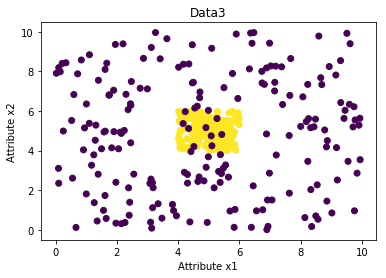

In [9]:
plt.scatter(Data3_X[:,0],Data3_X[:,1], c=Data3_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data3')
plt.show()

__Data2__ has four groups of points in $R^2$ with some small overlap. The two attributes are x1 and x2. Groups that are diagonally located belongs to the same class. 

- Data points are in variable Data2_X with 800 rows and 2 columns
- Class labels are in a variable Data2_Y with 800 rows and 1 column

In [10]:
np.random.seed(12995092)

a1 = np.random.multivariate_normal([2,2],[[0.25,0], [0,0.25]],200)
a2 = np.random.multivariate_normal([2,4],[[0.25,0], [0,0.25]],200)
a3 = np.random.multivariate_normal([4,2],[[0.25,0], [0,0.25]],200)
a4 = np.random.multivariate_normal([4,4],[[0.25,0], [0,0.25]],200)

Data2_X = np.vstack((a1,a4,a2,a3))
Data2_Y = np.hstack((np.ones(400).T,np.zeros(400).T)).astype(int)

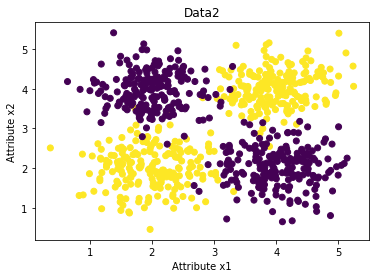

In [11]:
plt.scatter(Data2_X[:,0],Data2_X[:,1], c= Data2_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data2')
plt.show()

__Data1__ has two groups of points (shown in yellow and blue) with some small overlap in $R^2$. Each group belongs to a different class. The two attributes are x1 and x2.

- Data points are in variable Data1_X with 400 rows and 2 columns
- Class labels are in a variable Data1_Y with 400 rows and 1 column

In [12]:
np.random.seed(12995092)

a = np.random.multivariate_normal([2,2],[[0.5,0], [0,0.5]], 200)
b = np.random.multivariate_normal([4,4],[[0.5,0], [0,0.5]], 200)

Data1_X = np.vstack((a,b))
Data1_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)

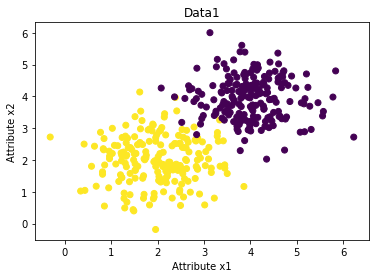

In [13]:
plt.scatter(Data1_X[:,0],Data1_X[:,1], c=Data1_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data1')
plt.show()

__Data4__ has points in $R^2$. The two attributes are x1 and x2. Data points from the 'blue' class are within a distance 10 from the origin, other points belong to 'yellow' class.

- Data points are in variable Data4_X with 400 rows and 2 columns
- Class labels are in a variable Data4_Y with 400 rows and 1 column

In [14]:
np.random.seed(12995092)

Data4_X = np.random.uniform(0,12,[500,2])
Data4_Y = np.ones([500]).astype(int)
Data4_Y[np.multiply(Data4_X[:,0],Data4_X[:,0]) + np.multiply(Data4_X[:,1],Data4_X[:,1]) - 100 < 0 ] = 0

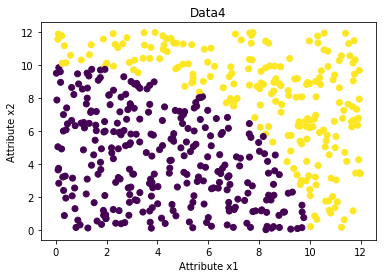

In [15]:
plt.scatter(Data4_X[:,0],Data4_X[:,1], c=Data4_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data4')
plt.show()

### 1. Decision Tree

Use __Data3__ to answer the following questions.

a. Compute the 10-fold cross-validation accuracy using decision tree classifiers with max_depth = 2,4,6,8,10, and 50. 

Creating an instance of a Decision Tree Classifier, we use arguments max_depth=2,4,6,8,10, and 50 to indicate that the tree can grow upto depth 2,4,6,8,10, and 50

In [16]:
dt2 = DecisionTreeClassifier(max_depth=2)

In [17]:
dt4 = DecisionTreeClassifier(max_depth=4)

In [18]:
dt6 = DecisionTreeClassifier(max_depth=6)

In [19]:
dt8 = DecisionTreeClassifier(max_depth=8)

In [20]:
dt10 = DecisionTreeClassifier(max_depth=10)

In [21]:
dt50 = DecisionTreeClassifier(max_depth=50)

Computing 10-fold cross-validation accuracy

In [22]:
dt_scores2 = cross_val_score(dt2, Data3_X, Data3_Y, cv=10, scoring='accuracy')

In [157]:
[dt_scores2.mean(), dt_scores2.std()]

[0.8724999999999999, 0.04670385423067351]

In [23]:
dt_scores4 = cross_val_score(dt4, Data3_X, Data3_Y, cv=10, scoring='accuracy')

In [158]:
[dt_scores4.mean(), dt_scores4.std()]

[0.97, 0.031224989991991976]

In [24]:
dt_scores6 = cross_val_score(dt6, Data3_X, Data3_Y, cv=10, scoring='accuracy')

In [159]:
[dt_scores6.mean(), dt_scores6.std()]

[0.9675, 0.03716517186829625]

In [25]:
dt_scores8 = cross_val_score(dt8, Data3_X, Data3_Y, cv=10, scoring='accuracy')

In [160]:
[dt_scores8.mean(), dt_scores8.std()]

[0.9625, 0.0340036762718386]

In [26]:
dt_scores10 = cross_val_score(dt10, Data3_X, Data3_Y, cv=10, scoring='accuracy')

In [161]:
[dt_scores10.mean(), dt_scores10.std()]

[0.9525, 0.042499999999999996]

In [27]:
dt_scores50 = cross_val_score(dt50, Data3_X, Data3_Y, cv=10, scoring='accuracy')

In [162]:
[dt_scores50.mean(), dt_scores50.std()]

[0.9424999999999999, 0.031721443851123785]

b. Plot decision regions for the above decision tree models

In [28]:
dt2.fit(Data3_X, Data3_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
dt4.fit(Data3_X, Data3_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
dt6.fit(Data3_X, Data3_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
dt8.fit(Data3_X, Data3_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
dt10.fit(Data3_X, Data3_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
dt50.fit(Data3_X, Data3_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

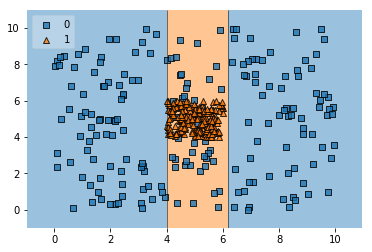

In [34]:
plot_decision_regions(Data3_X, Data3_Y, clf=dt2, legend=2)

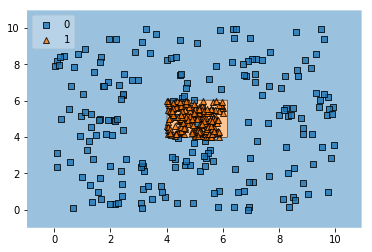

In [35]:
plot_decision_regions(Data3_X, Data3_Y, clf=dt4, legend=2)

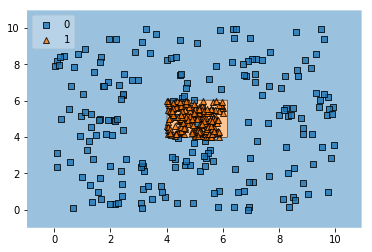

In [36]:
plot_decision_regions(Data3_X, Data3_Y, clf=dt6, legend=2)

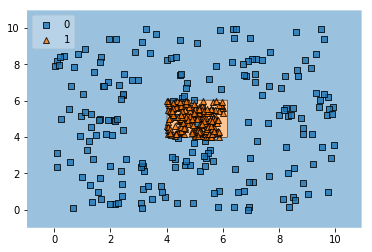

In [37]:
plot_decision_regions(Data3_X, Data3_Y, clf=dt8, legend=2)

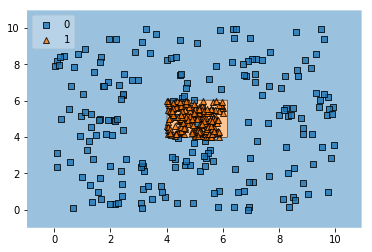

In [38]:
plot_decision_regions(Data3_X, Data3_Y, clf=dt10, legend=2)

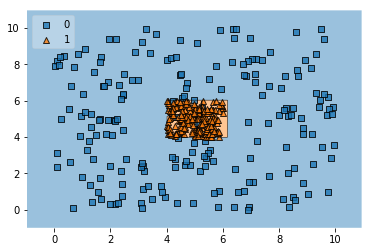

In [39]:
plot_decision_regions(Data3_X, Data3_Y, clf=dt50, legend=2)

c. For what values of max_depth did you observe the highest and lowest accuracies? Explain the reason for this using observations from the above decision regions.

Answer - By looking at the decision regions, the lowest accuracy is given by the depth 2 and all other depths give the same amount of accuracy. But by looking at the accuracy mean values, decision tree with depth 4 provides the best fitting model.

### 2. k Nearest Neighbor

Using __Data2__ to answer the following questions.

a. Compute the 10-fold cross-validation accuracy for a kNN classifier with n_neighbors = 1, 5, 10, 50

Creating an instance of a kNN Classifier, we use arguments n_neighbors=1,5,10,50 to indicate the #neighbors to be considered

In [40]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [41]:
knn_scores1 = cross_val_score(knn1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[knn_scores1.mean(), knn_scores1.std()]

[0.9525, 0.024874685927665497]

In [42]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [43]:
knn_scores5 = cross_val_score(knn5, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[knn_scores5.mean(), knn_scores5.std()]

[0.95375, 0.029606798205817544]

In [44]:
knn10 = KNeighborsClassifier(n_neighbors=10)

In [45]:
knn_scores10 = cross_val_score(knn10, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[knn_scores10.mean(), knn_scores10.std()]

[0.95375, 0.03309550573718432]

In [46]:
knn50 = KNeighborsClassifier(n_neighbors=50)

In [47]:
knn_scores50 = cross_val_score(knn50, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[knn_scores50.mean(), knn_scores50.std()]

[0.9574999999999999, 0.028062430400804566]

b. Plot decision regions for a kNN classifier with n_neighbors = 1, 5, 10, 50

In [48]:
knn1.fit(Data2_X, Data2_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

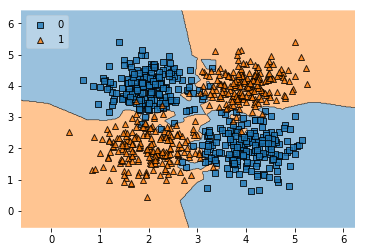

In [49]:
plot_decision_regions(Data2_X, Data2_Y, clf=knn1, legend=2)

In [50]:
knn5.fit(Data2_X, Data2_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

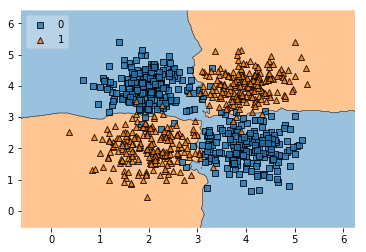

In [51]:
plot_decision_regions(Data2_X, Data2_Y, clf=knn5, legend=2)

In [52]:
knn10.fit(Data2_X, Data2_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

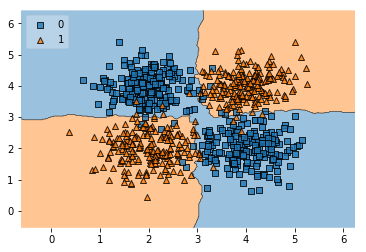

In [53]:
plot_decision_regions(Data2_X, Data2_Y, clf=knn10, legend=2)

In [54]:
knn50.fit(Data2_X, Data2_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

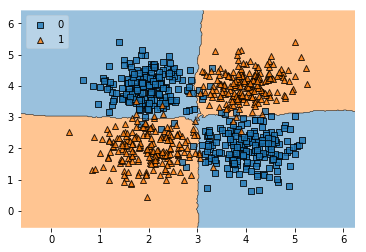

In [55]:
plot_decision_regions(Data2_X, Data2_Y, clf=knn50, legend=2)

c. For what values of 'n_neighbor' did you observe the highest and lowest accuracies? Explain the reason for this using observations from the above decision regions.

for n_neighbor = 50, we observed the highest accuracy and for n_neighbor = 1, we observed the lowest accuracy. 
The main reason is the overfitting of the with n = 50. While the accuracies are pretty much the same for various number of nearest neighbors, n=1 provides the lowest accuracy, the reason is that only the nearest data point is used when n=1.

### 3. Naive Bayes

a. Compute the 10-fold cross-validation accuracy for a NB classifier on all four datasets: Data1, Data2, Data3, Data4

Creating an instance of a NB Classifier.

In [56]:
nb = GaussianNB()

In [57]:
nb_scores1 = cross_val_score(nb, Data1_X, Data1_Y, cv=10, scoring='accuracy')
[nb_scores1.mean(), nb_scores1.std()]

[0.9775, 0.03051638903933426]

In [58]:
nb_scores2 = cross_val_score(nb, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[nb_scores2.mean(), nb_scores2.std()]

[0.035, 0.02783882181415011]

In [59]:
nb_scores3 = cross_val_score(nb, Data3_X, Data3_Y, cv=10, scoring='accuracy')
[nb_scores3.mean(), nb_scores3.std()]

[0.9625, 0.02304886114323222]

In [60]:
nb_scores4 = cross_val_score(nb, Data4_X, Data4_Y, cv=10, scoring='accuracy')
[nb_scores4.mean(), nb_scores4.std()]

[0.9480000000000001, 0.02993325909419151]

b. Plot decision regions for a NB classifier on each of the four datasets

In [63]:
nb.fit(Data1_X, Data1_Y)

GaussianNB(priors=None)

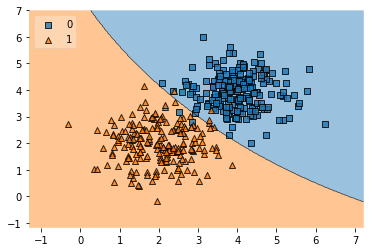

In [64]:
plot_decision_regions(Data1_X, Data1_Y, clf=nb, legend=2)

In [65]:
nb.fit(Data2_X, Data2_Y)

GaussianNB(priors=None)

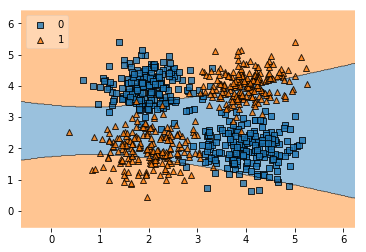

In [66]:
plot_decision_regions(Data2_X, Data2_Y, clf=nb, legend=2)

In [67]:
nb.fit(Data3_X, Data3_Y)

GaussianNB(priors=None)

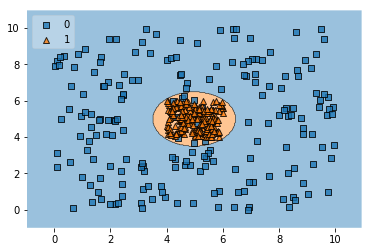

In [68]:
plot_decision_regions(Data3_X, Data3_Y, clf=nb, legend=2)

In [69]:
nb.fit(Data4_X, Data4_Y)

GaussianNB(priors=None)

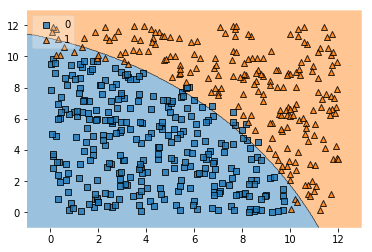

In [70]:
plot_decision_regions(Data4_X, Data4_Y, clf=nb, legend=2)

c. On which datasets did NB perform well and on which datasets did NB perform poorly? Explain the reason for this using observations from the above decision regions.

NB performed well on datasets 1, 3 and 4 and did not perform well on dataset 2. The reason behind this is the distribution of data points in dataset 2. 

### 4. Support Vector Machines (Linear)

a. Based on the visualization of the four datasets, assess how well a linear SVM is expected to perform. Specifically, rank the datasets in the order of decreasing accuracy when a linear SVM is used. No need to compute accuracy to answer this question.

In [ ]:
Based on the visualization of the four datasets, 

b. Compute the 10-fold cross-validation accuracy for a linear SVM classifier on all four datasets: Data1, Data2, Data3, Data4

In [71]:
svm_linear = SVC(C=0.5, kernel='linear')

In [72]:
svm_linear_scores1 = cross_val_score(svm_linear, Data1_X, Data1_Y, cv=10, scoring='accuracy')
[svm_linear_scores1.mean(), svm_linear_scores1.std()]

[0.975, 0.02958039891549808]

In [73]:
svm_linear_scores2 = cross_val_score(svm_linear, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_linear_scores2.mean(), svm_linear_scores2.std()]

[0.08499999999999999, 0.055845769759221696]

In [74]:
svm_linear_scores3 = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=10, scoring='accuracy')
[svm_linear_scores3.mean(), svm_linear_scores3.std()]

[0.6549999999999999, 0.043011626335213146]

In [75]:
svm_linear_scores4 = cross_val_score(svm_linear, Data4_X, Data4_Y, cv=10, scoring='accuracy')
[svm_linear_scores4.mean(), svm_linear_scores4.std()]

[0.9059999999999999, 0.03583294573433783]

c. Plot decision regions for a linear SVM classifier on each of the four datasets

In [76]:
svm_linear.fit(Data1_X, Data1_Y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

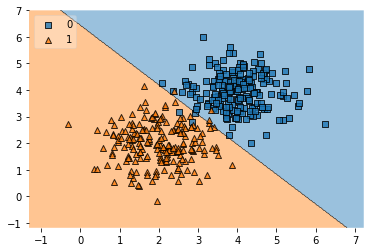

In [77]:
plot_decision_regions(Data1_X, Data1_Y, clf=svm_linear, legend=2)

In [78]:
svm_linear.fit(Data2_X, Data2_Y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

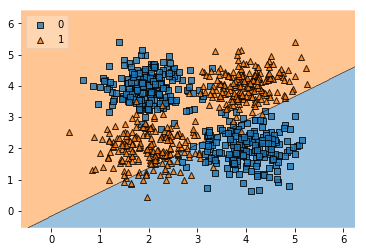

In [79]:
plot_decision_regions(Data2_X, Data2_Y, clf=svm_linear, legend=2)

In [80]:
svm_linear.fit(Data3_X, Data3_Y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

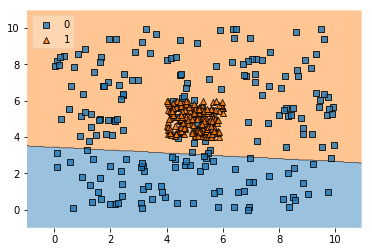

In [81]:
plot_decision_regions(Data3_X, Data3_Y, clf=svm_linear, legend=2)

In [82]:
svm_linear.fit(Data4_X, Data4_Y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

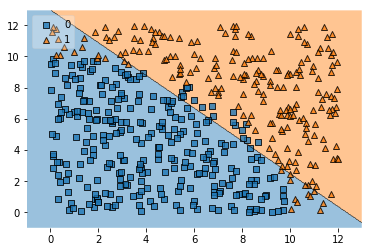

In [83]:
plot_decision_regions(Data4_X, Data4_Y, clf=svm_linear, legend=2)

c. On which datasets did the linear SVM perform well and on which datasets did it perform poorly? Explain the reason for this using observations from the above decision regions.

Answer - The datasets that performed well with linear SVM are : 1 and 4, the datasets that performed poorly with linear SVM are 2 and 3. The reason behind the poor performance of datasets 2 and 3 are the distribution of data points. For these data points, a linear classifier would not work well.

### 5. Non-linear Support Vector Machines

Use __Data2__ to answer the following questions.

a. Compute the 10-fold cross-validation accuracy for an SVM with a polynomial kernel and degree values 1, 2, and 3.

In [89]:
svm_poly1 = SVC(C=0.5, kernel='poly',degree=1)

In [90]:
svm_poly2 = SVC(C=0.5, kernel='poly',degree=2)

In [91]:
svm_poly3 = SVC(C=0.5, kernel='poly',degree=3)

In [92]:
svm_poly_scores1 = cross_val_score(svm_poly1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_poly_scores1.mean(), svm_poly_scores1.std()]

[0.08499999999999999, 0.055845769759221696]

In [93]:
svm_poly_scores2 = cross_val_score(svm_poly2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_poly_scores2.mean(), svm_poly_scores2.std()]

[0.8875, 0.04069705149024926]

In [94]:
svm_poly_scores3 = cross_val_score(svm_poly3, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_poly_scores3.mean(), svm_poly_scores3.std()]

[0.8925000000000001, 0.031224989991991987]

b. Plot decision regions for a polynomial kernel SVM with degree values 1, 2, and 3.

In [95]:
svm_poly1.fit(Data2_X, Data2_Y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

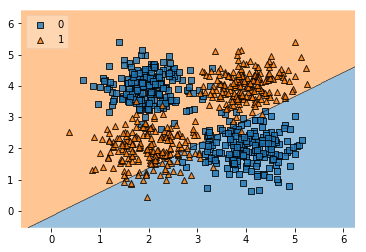

In [96]:
plot_decision_regions(Data2_X, Data2_Y, clf=svm_poly1, legend=2)

In [97]:
svm_poly2.fit(Data2_X, Data2_Y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

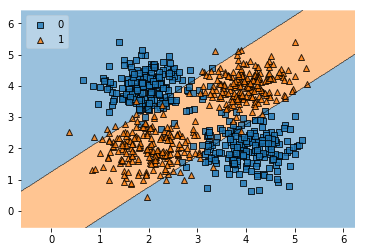

In [98]:
plot_decision_regions(Data2_X, Data2_Y, clf=svm_poly2, legend=2)

In [99]:
svm_poly3.fit(Data2_X, Data2_Y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

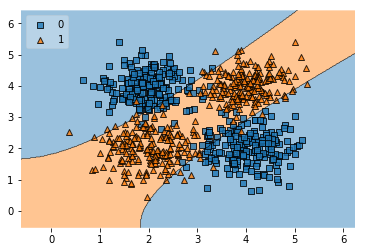

In [100]:
plot_decision_regions(Data2_X, Data2_Y, clf=svm_poly3, legend=2)

c. For what values of 'degree' did you observe the highest and lowest accuracies? Explain the reason for this using observations from the above decision regions.

For degree 3, we observe the highest accuracy and for degree 1 we observe the lowest accuracy. The reason is obvious, the data points are distributed in the manner that linear classifier is a bad choice whereas higher degree polynomials would be able to classify the data points well.

d. Compute the 10-fold cross-validation accuracy for an SVM with an RBF kernel and gamma values 0.01, 0.1, and 1.

In [103]:
svm_rbf001 = SVC(C = 0.5, kernel='rbf', gamma=0.01)

In [104]:
svm_rbf_scores001 = cross_val_score(svm_rbf001, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_rbf_scores001.mean(), svm_rbf_scores001.std()]

[0.16, 0.09695359714832658]

In [105]:
svm_rbf01 = SVC(C = 0.5, kernel='rbf', gamma=0.1)

In [106]:
svm_rbf_scores01 = cross_val_score(svm_rbf01, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_rbf_scores01.mean(), svm_rbf_scores01.std()]

[0.9574999999999999, 0.09695359714832658]

In [107]:
svm_rbf1 = SVC(C = 0.5, kernel='rbf', gamma=1)

In [108]:
svm_rbf_scores1 = cross_val_score(svm_rbf1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_rbf_scores1.mean(), svm_rbf_scores1.std()]

[0.9562499999999998, 0.03223449239556907]

e. Plot decision regions for the above decision tree models

In [109]:
svm_rbf001.fit(Data2_X, Data2_Y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

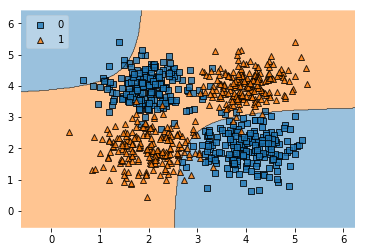

In [110]:
plot_decision_regions(Data2_X, Data2_Y, clf=svm_rbf001, legend=2)

In [111]:
svm_rbf01.fit(Data2_X, Data2_Y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

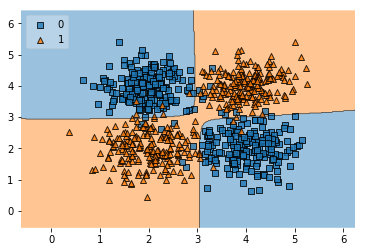

In [112]:
plot_decision_regions(Data2_X, Data2_Y, clf=svm_rbf01, legend=2)

In [113]:
svm_rbf1.fit(Data2_X, Data2_Y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

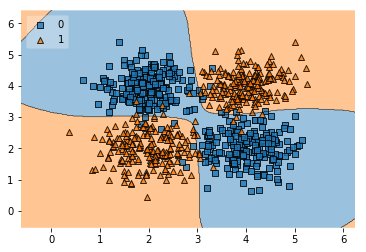

In [114]:
plot_decision_regions(Data2_X, Data2_Y, clf=svm_rbf1, legend=2)

f. For what values of 'gamma' did you observe the highest and lowest accuracies? Explain the reason for this using observations from the above decision regions.

We observe the highest accuracy with gamma value 0.1 and the lowest accuracy with gamma value 0.01

g. Between SVM with a Polynomial kernel and SVM with an RBF kernel, which one is ideally suited of Data2? Explain your reason.

Between the above listed methods, according to the accuracy values, SVM with RBF kernel is ideally suited for Data2. This is becuase the accuracy values of the latter method is consistently higher. The latter method is more flexible. The performance can change if we employ higher degree polynomials with SVM. There is no right answer to the question until and unless we test out model on the new data.

### 6. Classification Evaluation

a. Run SVM classifier (with RBF kernel and gamma=0.1) on __Data2__ and compute the mean of k-fold cross-validation accuracies for cv = 3, 4, 5 and 6. Report the mean of accuracies for each choice of 'cv' and explain the reason for any differences in the mean accuracy you observe.

In [115]:
svm_rbf01 = SVC(C = 0.5, kernel='rbf', gamma=0.1)

In [116]:
svm_rbf_scores01 = cross_val_score(svm_rbf01, Data2_X, Data2_Y, cv=3, scoring='accuracy')
[svm_rbf_scores01.mean(), svm_rbf_scores01.std()]

[0.9301238170051995, 0.04277222638283738]

In [117]:
svm_rbf_scores01 = cross_val_score(svm_rbf01, Data2_X, Data2_Y, cv=4, scoring='accuracy')
[svm_rbf_scores01.mean(), svm_rbf_scores01.std()]

[0.92875, 0.02301494079940244]

In [118]:
svm_rbf_scores01 = cross_val_score(svm_rbf01, Data2_X, Data2_Y, cv=5, scoring='accuracy')
[svm_rbf_scores01.mean(), svm_rbf_scores01.std()]

[0.94625, 0.02727178028658927]

In [119]:
svm_rbf_scores01 = cross_val_score(svm_rbf01, Data2_X, Data2_Y, cv=6, scoring='accuracy')
[svm_rbf_scores01.mean(), svm_rbf_scores01.std()]

[0.9488353686114882, 0.027686604968394805]

b. For DT, NB, kNN, Linear SVM, Polynomial Kernel SVM, and SVM with RBF kernel classifiers, compute the 30-fold crossvalidation __accuracies__ and __precision__ (use scoring='precision' when calling cross_val_score()) on __Data3__. Rank the classifiers based on accuracy and precision scores. Are the best classifiers ranked according to accuracy and precision the same? If not, explain the reason. 

For the classifiers, feel free to choose any parameter settings you prefer.

In [121]:
dt = DecisionTreeClassifier(max_depth=2)

In [123]:
knn = KNeighborsClassifier(n_neighbors=5)

In [124]:
dt_scores = cross_val_score(dt, Data3_X, Data3_Y, cv=30, scoring='precision')
knn_scores = cross_val_score(knn, Data3_X, Data3_Y, cv=30, scoring='precision')
nb_scores = cross_val_score(nb, Data3_X, Data3_Y, cv=30, scoring='precision')
svm_linear_scores = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=30, scoring='precision')
svm_poly_scores = cross_val_score(svm_poly, Data3_X, Data3_Y, cv=30, scoring='precision')
svm_rbf_scores = cross_val_score(svm_rbf, Data3_X, Data3_Y, cv=30, scoring='precision')

/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


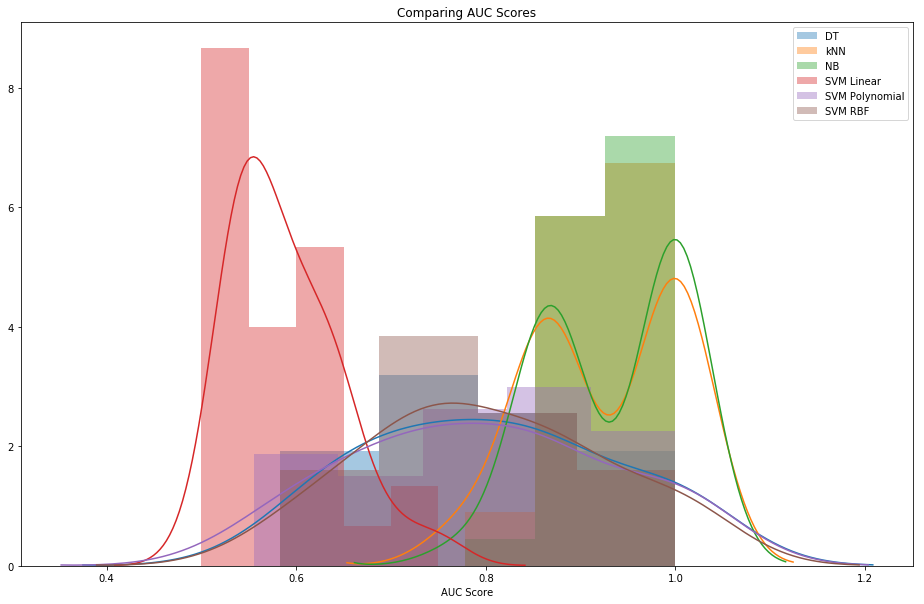

In [125]:
plt.figure(figsize=(16, 10))
sns.distplot(dt_scores,label='DT');
sns.distplot(knn_scores,label='kNN');
sns.distplot(nb_scores,label='NB');
sns.distplot(svm_linear_scores,label='SVM Linear');
sns.distplot(svm_poly_scores,label='SVM Polynomial');
ax=sns.distplot(svm_rbf_scores,label='SVM RBF');
ax.set(xlabel='AUC Score', title='Comparing AUC Scores')
ax.legend()

### 7. Ensemble Methods

a. __Bagging:__ Create bagging classifiers each with n_estimators = 1,2,3,4,5,10, and 20. Use a **linear SVM** (with C=0.5) as a base classifier. Using __Data3__, compute the mean __5-fold__ cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how bagging affected the mean and standard deviation of the base classifier. Explain your reason for what may have lead to these observations.

In [126]:
svm_linear = SVC(C=0.5, kernel='linear');
n_est_list = [1,2,3,4,5,10,20]
for n_est in n_est_list:
    # create an instance of bagging classifier with 'n_est' estimators
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(bagging, Data3_X, Data3_Y, cv=5, scoring='accuracy')
    print("Bagging Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Bagging Accuracy: 0.61 (+/- 0.06) #estimators: 1
Bagging Accuracy: 0.65 (+/- 0.13) #estimators: 2
Bagging Accuracy: 0.67 (+/- 0.04) #estimators: 3
Bagging Accuracy: 0.64 (+/- 0.11) #estimators: 4
Bagging Accuracy: 0.73 (+/- 0.08) #estimators: 5
Bagging Accuracy: 0.70 (+/- 0.06) #estimators: 10
Bagging Accuracy: 0.68 (+/- 0.07) #estimators: 20


b. Plot decision regions for the above bagging classifiers. 

In [128]:
# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'data3', 'alpha': 0.7}

/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


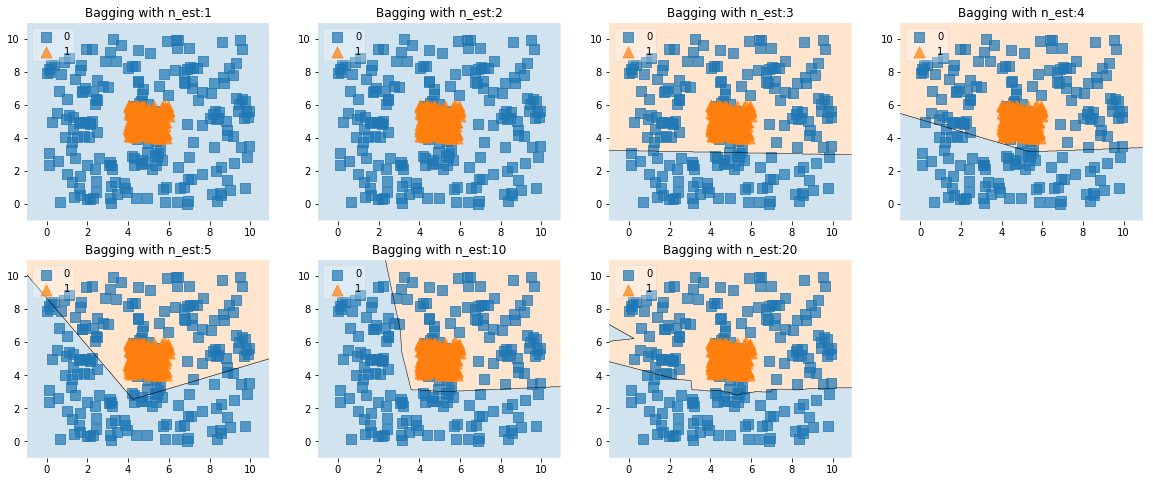

In [129]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    bagging.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=bagging, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Bagging with n_est:'+str(n_est))
    
plt.show()

c. Comment on the quality of the decision regions for a bagging classifiers with many estimators when compared to that of only one estimator. 

The quality of decision regions for the bagging classifier with many estimators as compared to that of only one estimator is not different at all. The accuracy of these regions is poor, which says that the method is not suitable for the classifying this data type.

d. **Boosting:**  Create boosting classifiers each with n_estimators = 1,2,3,4,5,10, 20, and 40. Use a **Decision Tree** (with max_depth=2) as a base classifier. Using __Data2__, compute the mean **10-fold** cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how boosting affected the mean and standard deviation of the base classifier. Explain your reason for what may have lead to these observations.

In [130]:
dt = DecisionTreeClassifier(max_depth=2)
n_est_list = [1,2,3,4,5,10,20,40]
for n_est in n_est_list:
    # create an instance of a boosting classifier with 'n_est' estimators
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(boosting, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print("Boosting Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Boosting Accuracy: 0.91 (+/- 0.06) #estimators: 1
Boosting Accuracy: 0.94 (+/- 0.05) #estimators: 2
Boosting Accuracy: 0.94 (+/- 0.05) #estimators: 3
Boosting Accuracy: 0.94 (+/- 0.05) #estimators: 4
Boosting Accuracy: 0.94 (+/- 0.05) #estimators: 5
Boosting Accuracy: 0.95 (+/- 0.03) #estimators: 10
Boosting Accuracy: 0.96 (+/- 0.03) #estimators: 20
Boosting Accuracy: 0.94 (+/- 0.03) #estimators: 40


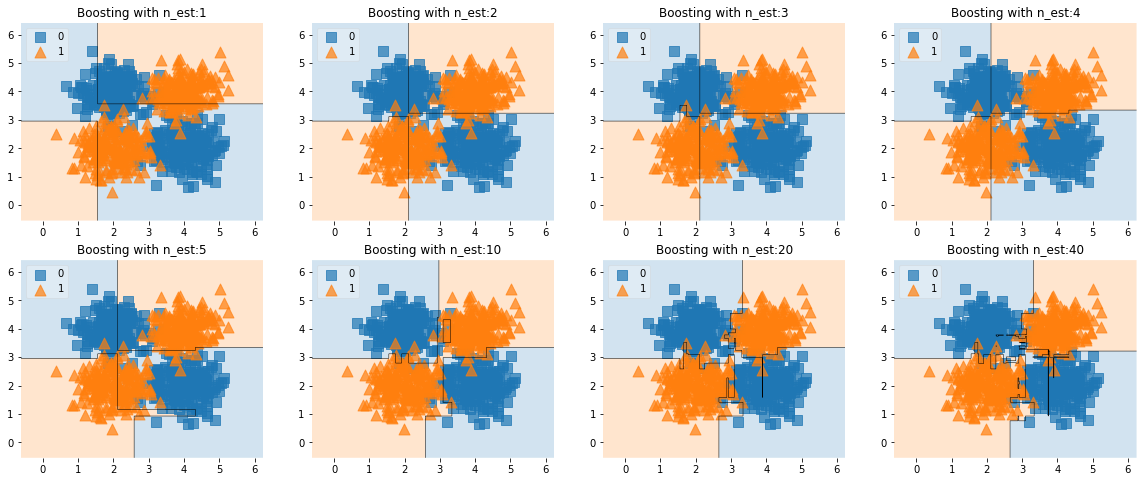

In [131]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    boosting.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=boosting, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Boosting with n_est:'+str(n_est))
    
plt.show()

### 8. Classification on a real-world dataset

Real world datasets typically have many attributes making it hard to visualize. This question is about using SVM and Decision Tree algorithms on a real world 'breast cancer' dataset.

The following code reads the dataset from the 'datasets' library in sklearn.

In [132]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [133]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='|S23')

Class labels are:

In [136]:
cancer.target_names

array(['malignant', 'benign'], dtype='|S9')

Create dataset for classification

In [137]:
X = cancer.data
Y = cancer.target

Number of samples and attributes are:

In [138]:
X.shape

(569, 30)

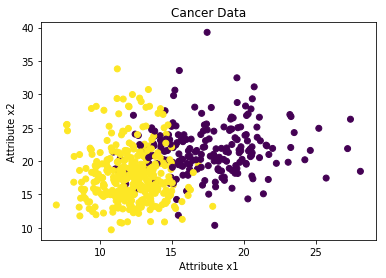

In [164]:
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Cancer Data')
plt.show()

a. Of all the SVM classifiers you explored in this hands-on exercise (i.e., linear SVM, SVM with a polynomial kernel and RBF kernel), which SVM results in a highest 10-fold cross-validation accuracy on this dataset? Explore the possible parameters for each SVM to determine the best performance for that SVM. For example, when studying linear SVM, explore a range of C values [0.001, 0.01, 0.1, 1, 10, 100]. Similarly for degree consider [1,2]. For gamma, consider [0.001, 0.01, 0.1, 1, 10, 100].

In [145]:
svm_linear001 = SVC(C=0.001, kernel='linear')

In [146]:
svm_linear01 = SVC(C=0.01, kernel='linear')

In [147]:
svm_linear_1 = SVC(C=0.1, kernel='linear')

In [148]:
svm_linear1 = SVC(C=1, kernel='linear')

In [149]:
svm_linear10 = SVC(C=10, kernel='linear')

In [150]:
svm_linear100 = SVC(C=100, kernel='linear')

In [151]:
svm_linear_scores001 = cross_val_score(svm_linear001, X, Y, cv=10, scoring='accuracy')
[svm_linear_scores001.mean(), svm_linear_scores001.std()]

[0.9402460893613342, 0.030630108832408708]

In [152]:
svm_linear_scores01 = cross_val_score(svm_linear01, X, Y, cv=10, scoring='accuracy')
[svm_linear_scores01.mean(), svm_linear_scores01.std()]

[0.947235545760954, 0.028461763431799632]

In [153]:
svm_linear_scores_1 = cross_val_score(svm_linear_1, X, Y, cv=10, scoring='accuracy')
[svm_linear_scores_1.mean(), svm_linear_scores_1.std()]

[0.9472366260478783, 0.020931116465631755]

In [154]:
svm_linear_scores1 = cross_val_score(svm_linear1, X, Y, cv=10, scoring='accuracy')
[svm_linear_scores1.mean(), svm_linear_scores1.std()]

[0.9543179068360554, 0.01940126867424318]

In [155]:
svm_linear_scores10 = cross_val_score(svm_linear10, X, Y, cv=10, scoring='accuracy')
[svm_linear_scores10.mean(), svm_linear_scores10.std()]

[0.9508393829401088, 0.021878712686924862]

In [156]:
svm_linear_scores100 = cross_val_score(svm_linear100, X, Y, cv=10, scoring='accuracy')
[svm_linear_scores100.mean(), svm_linear_scores100.std()]

[0.9524706161956615, 0.019629787876426823]

In [177]:
svm_poly001d1 = SVC(C=0.001, kernel='poly',degree=1)

In [178]:
svm_poly_scores001d1 = cross_val_score(svm_poly001d1, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores001d1.mean(), svm_poly_scores001d1.std()]

[0.9280269639616281, 0.02968518046820524]

In [165]:
svm_poly01d1 = SVC(C=0.01, kernel='poly',degree=1)

In [179]:
svm_poly_scores01d1 = cross_val_score(svm_poly01d1, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores01d1.mean(), svm_poly_scores01d1.std()]

[0.9402784979690605, 0.02242540044883814]

In [166]:
svm_poly_1d1 = SVC(C=0.1, kernel='poly',degree=1)

In [180]:
svm_poly_scores_1d1 = cross_val_score(svm_poly_1d1, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores_1d1.mean(), svm_poly_scores_1d1.std()]

[0.947266874081756, 0.02482952354062278]

In [167]:
svm_poly1d1 = SVC(C=1, kernel='poly',degree=1)

In [181]:
svm_poly_scores1d1 = cross_val_score(svm_poly1d1, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores1d1.mean(), svm_poly_scores1d1.std()]

[0.947266874081756, 0.02221239371835221]

In [168]:
svm_poly10d1 = SVC(C=10, kernel='poly',degree=1)

In [182]:
svm_poly_scores10d1 = cross_val_score(svm_poly10d1, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores10d1.mean(), svm_poly_scores10d1.std()]

[0.9508393829401088, 0.023106760062710438]

In [169]:
svm_poly100d1 = SVC(C=100, kernel='poly',degree=1)

In [183]:
svm_poly_scores100d1 = cross_val_score(svm_poly100d1, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores100d1.mean(), svm_poly_scores100d1.std()]

[0.961336530982629, 0.02176384227401191]

In [170]:
svm_poly001d2 = SVC(C=0.001, kernel='poly',degree=2)

In [184]:
svm_poly_scores001d2 = cross_val_score(svm_poly001d2, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores001d2.mean(), svm_poly_scores001d2.std()]

[0.9490849969751964, 0.02511818448227461]

In [171]:
svm_poly01d2 = SVC(C=0.01, kernel='poly',degree=2)

In [185]:
svm_poly_scores01d2 = cross_val_score(svm_poly01d2, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores01d2.mean(), svm_poly_scores01d2.std()]

[0.957919583441362, 0.027205751687965476]

In [172]:
svm_poly_1d2 = SVC(C=0.1, kernel='poly',degree=2)

In [186]:
svm_poly_scores_1d2 = cross_val_score(svm_poly_1d2, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores_1d2.mean(), svm_poly_scores_1d2.std()]

[0.957919583441362, 0.024750796037684784]

In [173]:
svm_poly1d2 = SVC(C=1, kernel='poly',degree=2)

In [187]:
svm_poly_scores1d2 = cross_val_score(svm_poly1d2, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores1d2.mean(), svm_poly_scores1d2.std()]

[0.9579509117621638, 0.023506830589711532]

In [174]:
svm_poly10d2 = SVC(C=10, kernel='poly',degree=2)

In [188]:
svm_poly_scores10d2 = cross_val_score(svm_poly10d2, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores10d2.mean(), svm_poly_scores10d2.std()]

[0.957920663728286, 0.02088973973418385]

In [175]:
svm_poly100d2 = SVC(C=100, kernel='poly',degree=2)

In [195]:
svm_poly_scores100d2 = cross_val_score(svm_poly100d2, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores100d2.mean(), svm_poly_scores100d2.std()]

[0.9579509117621638, 0.023506830589711532]

b. Similar to (a) explore decision trees with different max_depth to determine which values returns the best classifier.

The value of max_depth that returns the best classifier is both 2 and 4 as they have exactly the same accuracy values

In [189]:
dt1 = DecisionTreeClassifier(max_depth=2)

In [190]:
dt_scores1 = cross_val_score(dt1, X, Y, cv=10, scoring='accuracy')
[dt_scores1.mean(), dt_scores1.std()]

[0.9211639011321406, 0.027779671854087556]

In [191]:
d2 = DecisionTreeClassifier(max_depth=4)

In [192]:
dt_scores2 = cross_val_score(dt2, X, Y, cv=10, scoring='accuracy')
[dt_scores2.mean(), dt_scores2.std()]

[0.9211639011321406, 0.027779671854087556]

In [193]:
dt3 = DecisionTreeClassifier(max_depth=8)

In [194]:
dt_scores3 = cross_val_score(dt3, X, Y, cv=10, scoring='accuracy')
[dt_scores3.mean(), dt_scores3.std()]

[0.9071277331259182, 0.035248244340492875]

c. Imagine a scenario where you are working at a cancer center as a data scientist tasked with identifying the characteristics that distinguish malignant tumors from benign tumors. Based on your knowledge of classification techniques which approach would you use and why?

Given the dataset, we have observed the shape and distribution of the data. Various data points belonging to different response are overlapping in the dataset. It would be very difficult to perfectly classify the data sets. In the given problem, wieght should be higher to the data points that can be potentially malignant, that is, the points which can tell us the possibility of a cancer. Based on the knowledge of classification techniques, Naive Bayes, KNN or SVM could be used on the data set to produce good results and create a model that is balanced.